In [6]:
import numpy as np
import pandas as pd
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", UserWarning)

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

import collections
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE 
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.metrics import precision_recall_fscore_support

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
#from pytorch_tabnet.tab_model import TabNetClassifier
from tqdm.notebook import tqdm

In [7]:
data = './Dataset/formatted_dataset.csv'
read = pd.read_csv(data)
df = read.iloc[:,:]
df.shape

(16232943, 79)

In [ ]:
#df.info()

In [8]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [9]:
print(df.iloc[:,:78])

scaler = MinMaxScaler()

          Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  \
0                0         0      15905      112641719             3   
1                0         0      16074      112641466             3   
2                0         0      16243      112638623             3   
3               22         6      16457        6453966            15   
4               22         6      16467        8804066            14   
...            ...       ...        ...            ...           ...   
16232938      3389         6       4098        3982183            14   
16232939      3389         6       4102        3802316            14   
16232940      3389         6       4105        4004239            14   
16232941      3389         6       4109        3998435            14   
16232942      3389         6       4113        3972651            14   

          Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                    0              0.0              0.0  

NameError: name 'MinMaxScaler' is not defined

In [10]:
scaler = MaxAbsScaler()

X = scaler.fit_transform(df[['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']])

#X =  normalize(df.iloc[:,:76])
print(X.shape)
y = df['Label']
print(y.shape)

y = LabelEncoder().fit_transform(y)

(16232943, 78)
(16232943,)


In [11]:
print(collections.Counter(y))

Counter({0: 13484708, 3: 1263933, 4: 654300, 2: 380949, 1: 286191, 5: 161934, 6: 928})


In [12]:
strategy = {0: 13484708, 3: 1263933, 4: 654300, 2: 654300, 1: 654300, 5: 654300, 6: 654300}
#{1: 2359289, 0: 1132298}
#{1: 1651502, 0: 792608}
smt = SMOTE(sampling_strategy=strategy, k_neighbors=5, random_state=42)
X, y = smt.fit_resample(X, y)

#strategy_tl = {0: 654300, 3: 654300, 4: 654300, 2: 654300, 1: 654300, 5: 654300, 6: 654300}
rus = RandomUnderSampler(sampling_strategy='not minority',random_state=42)
X, y = rus.fit_resample(X, y)

In [13]:
print(collections.Counter(y))

Counter({0: 654300, 1: 654300, 2: 654300, 3: 654300, 4: 654300, 5: 654300, 6: 654300})


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size = 0.5, random_state=42, stratify=y_test)

a = np.array(y_train)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_train = b
print(y_train.shape)

a = np.array(y_test)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_test = b
print(y_test.shape)

a = np.array(y_val)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_val = b
print(y_val.shape)

(3206070, 7)
(687015, 7)
(687015, 7)


In [15]:
# reshape the data for CNN
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_val = X_val.reshape(len(X_val),  X_val.shape[1], 1)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3206070, 78, 1)
(687015, 78, 1)
(687015, 78, 1)


In [20]:
from keras.backend import reshape
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',input_shape=(78,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

his = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=0)

#KerasClassifier(build_fn=model, epochs=200, batch_size=5, verbose=0)


In [21]:
accuracy = model.evaluate(X_test, y_test)
print((accuracy*100))

21470/21470 [==============================] - 120s 6ms/step - loss: 0.0679 - accuracy: 0.9695
[0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.06787901371717453, 0.9695261120796204, 0.

In [22]:
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_test_class = np.argmax(y_test, axis=1)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.972362  0.813022  0.885582     98145
           1   0.999847  0.999175  0.999511     98145
           2   0.999929  0.999878  0.999903     98145
           3   0.997145  1.000000  0.998570     98145
           4   0.999725  1.000000  0.999862     98145
           5   0.843263  0.974935  0.904331     98145
           6   0.994395  0.999674  0.997028     98145

    accuracy                       0.969526    687015
   macro avg   0.972381  0.969526  0.969255    687015
weighted avg   0.972381  0.969526  0.969255    687015



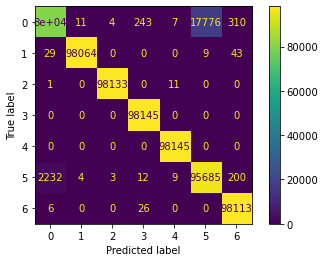

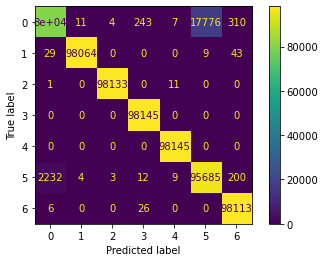

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_class, y_pred).plot()

In [33]:
model.save('./2018_Smote_CNN.h5')

Create a qunatized model for the model.

In [37]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model_2018 = converter.convert()

2022-07-02 12:17:37,256 [5696] WARNING  absl:769: [JupyterRequire] Buffer deduplication procedure will be skipped when flatbuffer library is not properly loaded


In [38]:
with open('tflite_2018_model.tflite', 'wb') as p:
    p.write(tflite_quant_model_2018)

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 76, 64)            256       
                                                                 
 conv1d_7 (Conv1D)           (None, 74, 64)            12352     
                                                                 
 dropout_3 (Dropout)         (None, 74, 64)            0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 37, 64)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2368)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               236900    
                                                      

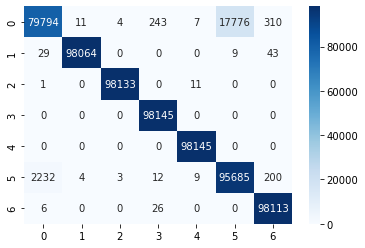

<Figure size 432x288 with 0 Axes>

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_class, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.show()
plt.savefig('./confusion_matrix_2018.png')